#**Energy Use of Appliances in a Low-Energy House**


### Data Set Information

Data Source: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction  

The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. 

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. 

### Attribute Information



```
date time year-month-day hour:minute:second
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH_1, Humidity in kitchen area, in %
T2, Temperature in living room area, in Celsius
RH_2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH_3, Humidity in laundry room area, in %
T4, Temperature in office room, in Celsius
RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH_5, Humidity in bathroom, in %
T6, Temperature outside the building (north side), in Celsius
RH_6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH_7, Humidity in ironing room, in %
T8, Temperature in teenager room 2, in Celsius
RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH_9, Humidity in parents room, in %
To, Temperature outside (from Chievres weather station), in Celsius
Pressure (from Chievres weather station), in mm Hg
RH_out, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â°C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional
```



# Import the libraries

In [ ]:
#@title
# Python
import math, time, random, datetime
from IPython.display import HTML
from functools import reduce

# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('white')
import missingno as msno
colormap = plt.cm.RdBu
colors = ['tomato','teal','darkred','darkolivegreen','darkorange','darkslategray', 'darkgoldenrod','maroon','seagreen','cadetblue']
from scipy.stats import norm
from scipy import stats

# Data Prep
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, Normalizer, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer

# Model Training
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor,StackingRegressor,VotingRegressor
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance


#Model Evaluation
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV , KFold , StratifiedKFold

# Warning Control
import warnings
warnings.filterwarnings('ignore')

# Part 1: Importing the dataset

In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title
path = "drive/My Drive/Colab Notebooks/data/energy/"

In [ ]:
#@title
energy_data = pd.read_csv(path+'energydata_complete.csv')

# Part 2: Exploratory Data Analysis 


### Dimensions of Dataset

In [ ]:
#@title
energy_data.shape

(19735, 29)

In [ ]:
#@title
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

Age, Cabin and Embarked are missing values

In [ ]:
#@title
energy_data.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

In [ ]:
#@title
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


###Target Distribution

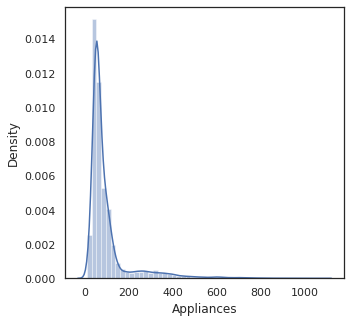

In [ ]:
#@title
plt.figure(figsize=(5, 5))
sns.distplot(energy_data['Appliances'])

#### Density Plots

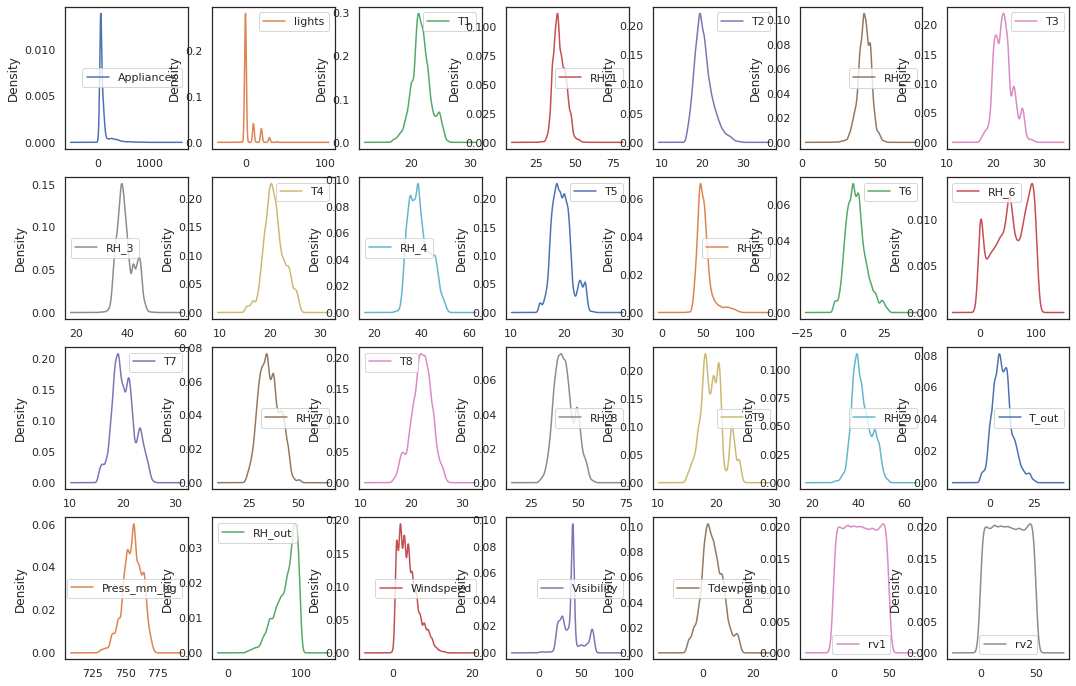

In [ ]:
#@title
energy_data.plot(kind='density', subplots=True, layout=(4,7), sharex=False,figsize=(18,12))
plt.show()

###Multivariate Plots


#### Correlation
Correlation gives an indication of how related the changes are between two variables. If two
variables change in the same direction they are positively correlated.

In [ ]:
#@title
cor = energy_data.corr()
cor_target = abs(cor['Appliances'])
#Selecting highly correlated features
highly_corr = cor_target[cor_target>0.075]
highly_corr = highly_corr.index.tolist()

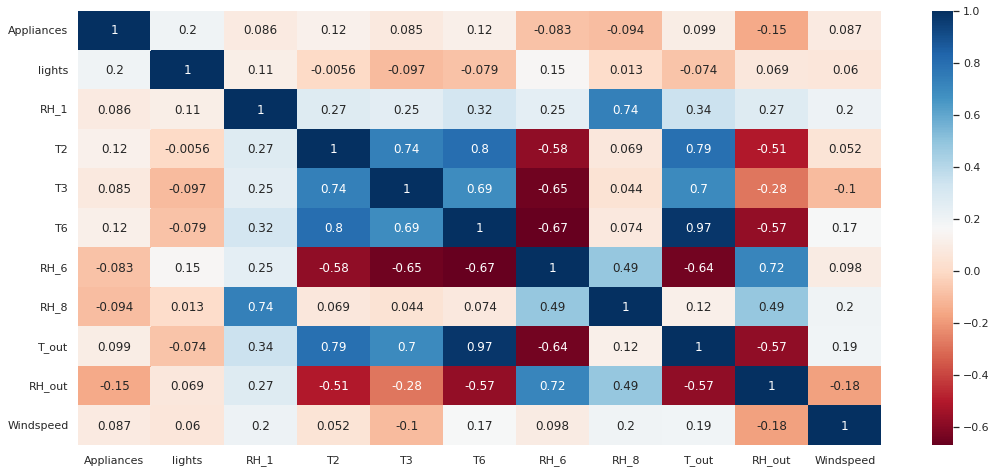

In [ ]:
#@title
plt.figure(figsize=(18,8))
sns.heatmap(energy_data[highly_corr].corr(), annot=True, cmap=colormap)

#Part 3: Data Preparation

##Data Quality Assessment

###Inconsistent values

The below code shows the data type and values of each column. Review columns and see if the data type matches the column values.

In [ ]:
#@title
pd.DataFrame({"values":{col:energy_data[col].unique() for col in energy_data},'type':{col:energy_data[col].dtype for col in energy_data}})

,values,type
date,"[2016-01-11 17:00:00, 2016-01-11 17:10:00, 201...",object
Appliances,"[60, 50, 70, 230, 580, 430, 250, 100, 90, 80, ...",int64
lights,"[30, 40, 50, 70, 60, 10, 20, 0]",int64
T1,"[19.89, 19.8566666666667, 19.79, 19.9266666666...",float64
RH_1,"[47.59666666666671, 46.69333333333329, 46.3, 4...",float64
T2,"[19.2, 19.23, 19.3566666666667, 19.42666666666...",float64
RH_2,"[44.79, 44.7225, 44.6266666666667, 44.59, 44.5...",float64
T3,"[19.79, 19.73, 19.89, 20.033333333333296, 20.1...",float64
RH_3,"[44.73, 44.79, 44.933333333333294, 45.0, 44.9,...",float64
T4,"[19.0, 18.9266666666667, 18.89, 18.96333333333...",float64


###Missing Data

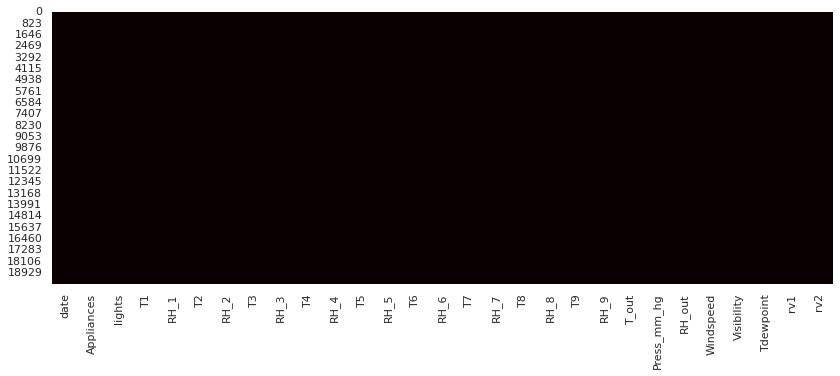

In [ ]:
#@title
plt.figure(figsize=(14,5))
sns.heatmap(energy_data.isnull(), cbar=False, cmap = "hot")

No missing data

##Data Transformation

### Feature Engineering

In [ ]:
#@title
# parse datetime column 
energy_data['date'] = pd.to_datetime(energy_data['date']).astype('datetime64')

####Datetime Features

In [ ]:
#@title
energy_data['month'] = energy_data['date'].dt.month.astype(int)
energy_data['day_of_month'] = energy_data['date'].dt.day.astype(int)
energy_data['year'] = energy_data['date'].dt.year.astype(int)
energy_data['hour_of_day'] = energy_data['date'].dt.hour.astype(int)
energy_data['day_of_week'] = energy_data['date'].dt.dayofweek.astype(int)

In [ ]:
#@title
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
energy_data['day_name'] = energy_data['date'].dt.dayofweek.map(dayOfWeek)

In [ ]:
#@title
grouped_date_df = energy_data.groupby('date') 
grouped_hour_df = energy_data.groupby('hour_of_day')
grouped_dayweek_df = energy_data.groupby('day_name',sort=False)

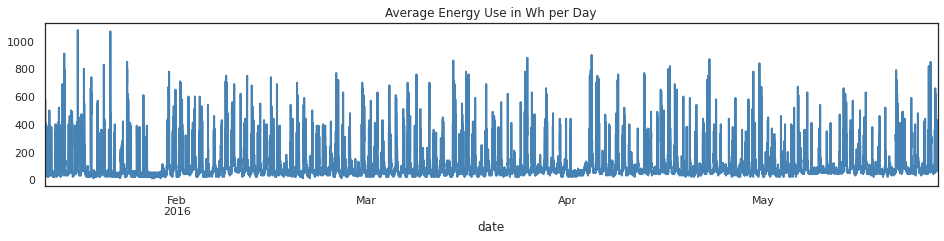

In [ ]:
#@title
grouped_date_df['Appliances'].agg(np.mean).plot(linewidth=2,color='steelblue',title ="Average Energy Use in Wh per Day", figsize=(16, 3));

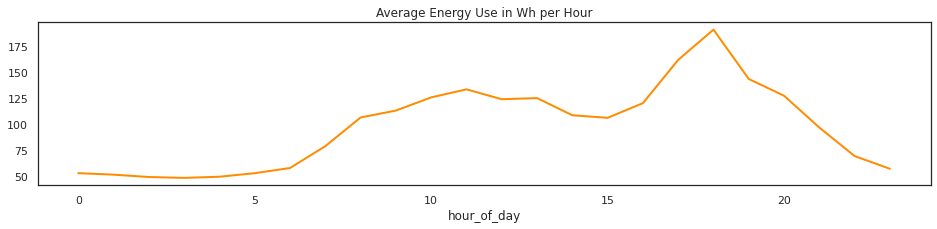

In [ ]:
#@title
grouped_hour_df['Appliances'].agg(np.mean).plot(linewidth=2,color='darkorange',title ="Average Energy Use in Wh per Hour", figsize=(16, 3));

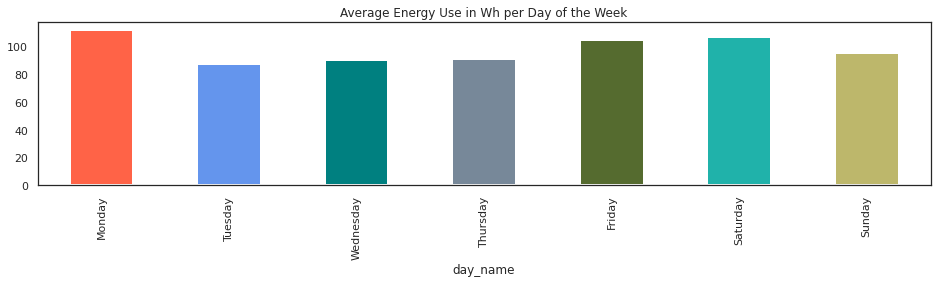

In [ ]:
#@title
grouped_dayweek_df['Appliances'].agg(np.mean).plot(kind='bar', linewidth=2,color=['tomato','cornflowerblue','teal','lightslategrey','darkolivegreen','lightseagreen','darkkhaki'],title ="Average Energy Use in Wh per Day of the Week", figsize=(16, 3));

### Feature and Label

In [ ]:
#@title
energy_data['date'] = pd.to_datetime(energy_data['date']).astype(np.int64)

In [ ]:
#@title
label = energy_data['Appliances'].tolist()

In [ ]:
#@title
features = energy_data.drop(['Appliances', 'day_name'], axis = 1)

###Feature Selection

In [ ]:
#@title
xgb = XGBRegressor(learning_rate=0.01,n_estimators=3460, max_depth=3, min_child_weight=0, gamma=0, subsample=0.7, colsample_bytree=0.7, objective='reg:linear', nthread=-1, scale_pos_weight=1, seed=27, reg_alpha=0.00006)

In [ ]:
#@title
xgb.fit(features,label)

[02:50:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, learning_rate=0.01, min_child_weight=0,
             n_estimators=3460, nthread=-1, reg_alpha=6e-05, seed=27,
             subsample=0.7)

In [ ]:
#@title
important_feats = xgb.feature_importances_

In [ ]:
#@title
def feature_importances (model, X, y, percentage):
  model.fit(X,y)
  sorted_idx = model.feature_importances_.argsort()
  feat_importances = pd.Series(model.feature_importances_[sorted_idx], index=X.columns[sorted_idx])
  feat_importances = feat_importances.to_frame(name='FeatureRating')
  return feat_importances.sort_values('FeatureRating',ascending=False).head(round(percentage*len(feat_importances)))

In [ ]:
#@title
selected_features = feature_importances(xgb, features, label, 0.5)

[03:23:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


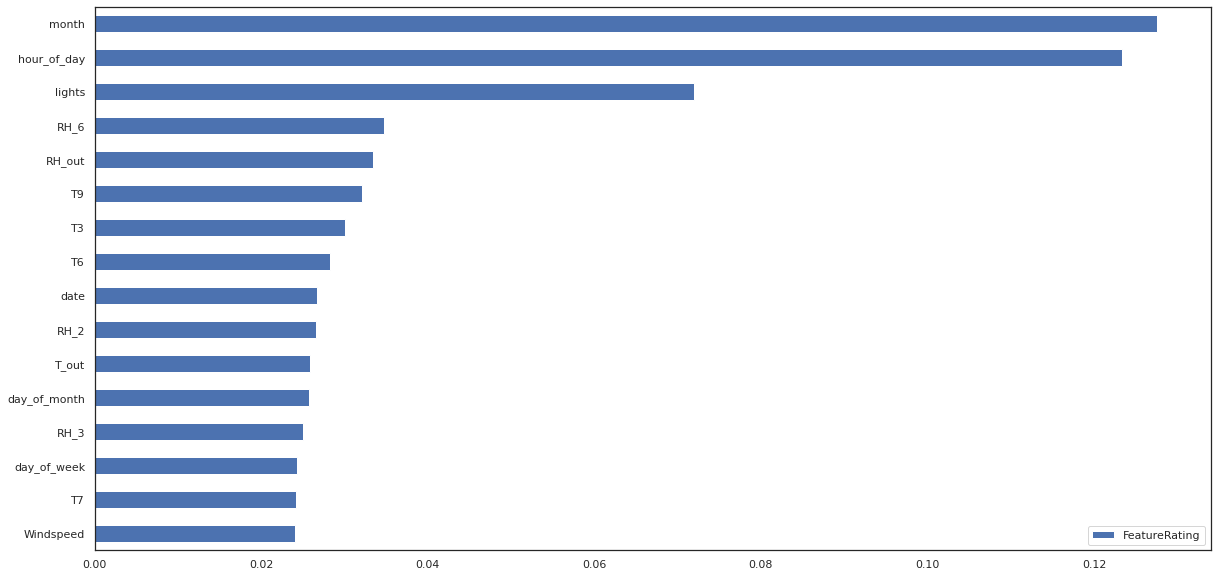

In [ ]:
#@title
selected_features.sort_values('FeatureRating',ascending=True).plot(kind='barh', figsize = (20,10))

In [ ]:
#@title
selected_cols = selected_features.index.tolist()

In [ ]:
#@title
selected_cols.append('Appliances')

In [ ]:
#@title
selected_data = energy_data[selected_cols]

###Split Train and Test Data

In [ ]:
#@title
y = selected_data['Appliances'].tolist()

In [ ]:
#@title
X = selected_data.drop(['Appliances'], axis = 1)

The test and train needs to be split prior to model training

In [ ]:
#@title
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state=42, shuffle = False)

### Feature Scaling

In [ ]:
#@title
scaler = MinMaxScaler()

In [ ]:
#@title
X_Scaled = scaler.fit_transform(X_train)

#Part 4: Model Training

##Machine Learning Algorithms

In [ ]:
#@title
model_names = ['LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor', 'BaggingRegressor', 'GradientBoostingRegressor', 'AdaBoostRegressor', 'XGBRegressor', ]  

In [ ]:
#@title
regressions = [
    LinearRegression(),
    Ridge(),
    Lasso(alpha =0.0005, random_state=0),
    RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=0),
    BaggingRegressor(n_estimators=100),
    GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =0),
    AdaBoostRegressor(n_estimators=100, random_state=0), 
    XGBRegressor(learning_rate=0.01,n_estimators=3460,
                 max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006),]

Every model in Scikit-learn has a score method after being trained on X_train, y_train. Models have a score method providing a default evaluation criterion for the problem they are designed to solve. 

In [ ]:
#@title
def fit_models(names, models, X_train, y_train):

    scores = []
    for name, model in zip(names, models):
        model.fit(X_train, y_train)
        score = model.score(X_train, y_train)
        score = round(model.score(X_train, y_train) * 100, 2)
        scores.append(score)

    results = list(zip(names, scores))
    df = pd.DataFrame(results, columns = ['Model', 'Score']).sort_values(by='Score', ascending=False)
    return df

In [ ]:
#@title
unscaled = fit_models(model_names, regressions, X_train, y_train)

[03:29:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#@title
scaled = fit_models(model_names, regressions, X_train, y_train)

[03:34:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#@title
def multiple_df_merge(lst_dfs,lst_cols, on):
    reduce_func = lambda left,right: pd.merge(left, right, on=on)
    df = reduce(reduce_func, lst_dfs)
    df.columns = lst_cols
    return df

In [ ]:
#@title
trained_scores = [scaled, unscaled]
trained_list_cols = ['Model', 'scaled', 'unscaled']

In [ ]:
#@title
scores_df = multiple_df_merge(trained_scores, trained_list_cols, 'Model')

In [ ]:
#@title
def plot_lines_from_df(df,x_axis,colors): 
  col = df.columns.tolist()
  plt.figure(figsize=(12,5))

  count = 0

  for i in col[1:]:
    plt.plot(df[x_axis],df[i], color=colors[count])
    count += 1

  plt.legend(col[1:])    
  plt.xticks(rotation = 45) # Rotates X-Axis 
  plt.show()

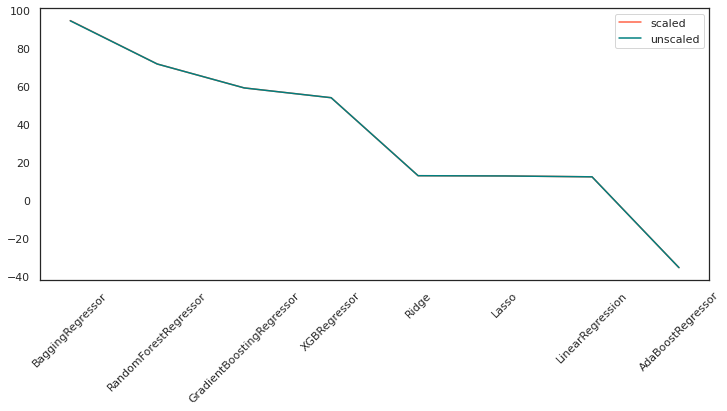

In [ ]:
#@title
plot_lines_from_df(scores_df,'Model',colors)

# Part 5: Model Evaluation Metrics 

###Top 3 Models

In [ ]:
#@title
top_models = ['RandomForestRegressor', 'BaggingRegressor', 'GradientBoostingRegressor']  

In [ ]:
#@title
top_regressions = [
    RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=0),
    BaggingRegressor(n_estimators=100),
    GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =0),]

In [ ]:
#@title
def predict_models(names, models, X_train, y_train):

    y_preds = []
    for name, model in zip(names, models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_train).tolist()
        y_preds.append(y_pred)
 
    pred_dict = dict(zip(names, y_preds))
    pred_dict = pd.DataFrame.from_dict(pred_dict)
    return pred_dict

In [ ]:
#@title
pred_dict = predict_models(top_models, top_regressions, X_train, y_train)


##Evaluation

$$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$$

$$ RMSE = \sqrt{\sum_{i=1}^{N}(y_i-y_{i}^{pred})^2} $$

$$\text{RMSLE} = \sqrt{\frac{1}{N} \sum_{i = 1}^{N} (\log y_i - \log \hat y_i)^2}$$

###Performance Metrics

In [ ]:
#@title
def get_metrics_values(y_test, pred_dict, metric_name):

  models = pred_dict.columns.tolist()

  metrics_list = []
  for model in models:
    if metric_name == 'MSE':
      metric = mean_squared_error(y_test, pred_dict[model])    
    elif metric_name == 'RMSE':
      metric = mean_squared_error(y_test, pred_dict[model], squared=False)
    elif metric_name == 'RMSLE':
      metric = mean_squared_log_error(y_test, pred_dict[model], squared=False)
    metrics_list.append(metric)
  
  metrics_dict = dict(zip(models, metrics_list))
  metrics_df = pd.DataFrame([metrics_dict])
  metrics_df['Evaluation'] = metric_name
  first_col = metrics_df.pop('Evaluation')
  metrics_df.insert(0, 'Evaluation', first_col)
  return metrics_df

#### MSE (sklearn)

In [ ]:
#@title
mse = get_metrics_values(y_train, pred_dict, metric_name = 'MSE')
mse

,Evaluation,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
0,MSE,3234.258831,628.497486,4673.216091


#### RMSE (sklearn)

In [ ]:
#@title
rmse = get_metrics_values(y_train, pred_dict, metric_name = 'RMSE')
rmse

,Evaluation,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
0,RMSE,56.870544,25.069852,68.360925


#### RMSLE (sklearn)

In [ ]:
#@title
rmsle = get_metrics_values(y_train, pred_dict, metric_name = 'RMSLE')
rmsle

,Evaluation,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
0,RMSLE,0.338804,0.161915,0.335451


###Regression Metrics Analysis

In [ ]:
#@title
evaluation_mse = pd.concat([mse]).T
evaluation_rmse = pd.concat([rmse]).T
evaluation_rmsle = pd.concat([rmsle]).T

In [ ]:
#@title
def get_evaluation_df(evaluation_df, metric_name):
  evaluation_df.columns = evaluation_df.iloc[0].values.tolist()
  evaluation_df['Model'] = evaluation_df.index
  first_col = evaluation_df.pop('Model')
  evaluation_df.insert(0, 'Model', first_col)
  evaluation_df.reset_index(inplace=True)
  evaluation_df.drop(evaluation_df.index[evaluation_df['Model'] == 'Evaluation'], inplace=True)
  evaluation_df.drop('index', axis=1, inplace=True)
  evaluation_df.sort_values(by=[metric_name], ascending=True, inplace=True)
  return evaluation_df

In [ ]:
#@title
evaluation_mse = get_evaluation_df(evaluation_mse, metric_name = 'MSE')
evaluation_rmse = get_evaluation_df(evaluation_rmse, metric_name = 'RMSE')
evaluation_rmsle = get_evaluation_df(evaluation_rmsle, metric_name = 'RMSLE')

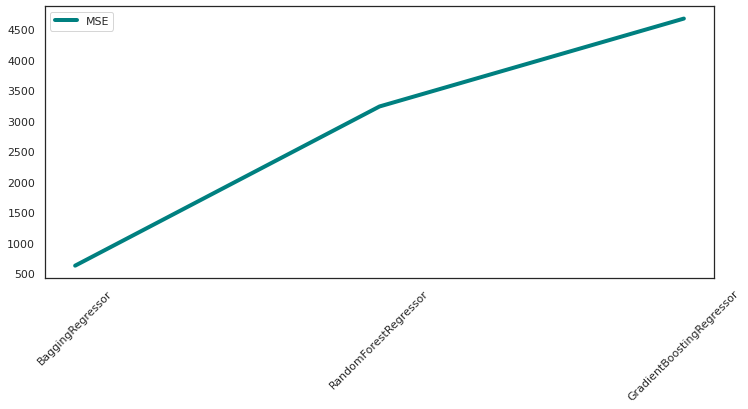

In [ ]:
#@title
plt.figure(figsize=(12,5))
plt.plot(evaluation_mse.Model,evaluation_mse.MSE, color='teal', linewidth=4, label="MSE")
plt.xticks(rotation = 45) # Rotates X-Axis 
plt.legend()
plt.show()

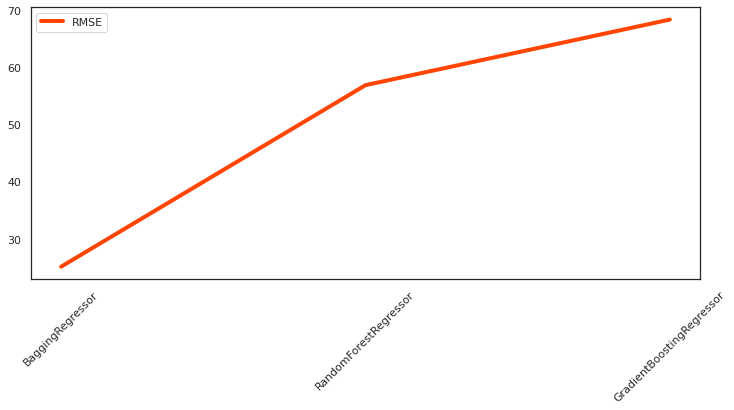

In [ ]:
#@title
plt.figure(figsize=(12,5))
plt.plot(evaluation_rmse.Model,evaluation_rmse.RMSE, color='orangered', linewidth=4, label="RMSE")
plt.xticks(rotation = 45) # Rotates X-Axis 
plt.legend()
plt.show()

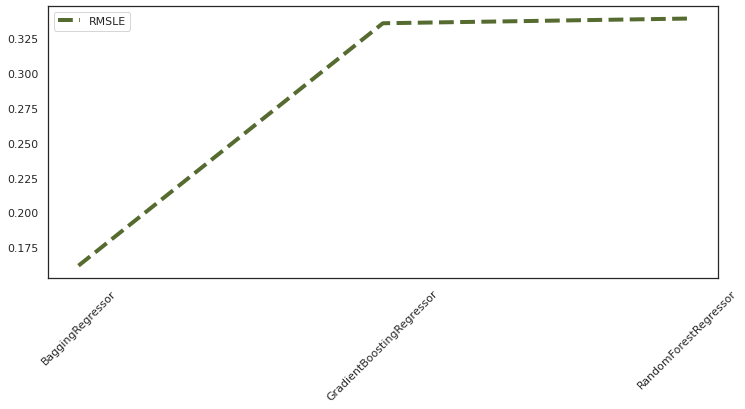

In [ ]:
#@title
plt.figure(figsize=(12,5))
plt.plot(evaluation_rmsle.Model, evaluation_rmsle.RMSLE, color='darkolivegreen', linewidth=4, label="RMSLE", linestyle='dashed')
plt.xticks(rotation = 45) # Rotates X-Axis 
plt.legend()
plt.show()

### Final Prediction

In [ ]:
#@title
br = BaggingRegressor(n_estimators = 200, n_jobs = -1, random_state = 10)

In [ ]:
#@title
best_predictor = br.fit(X_train, y_train)

In [ ]:
#@title
train_predictions = best_predictor.predict(X_train)

In [ ]:
#@title
test_predictions = best_predictor.predict(X_test)

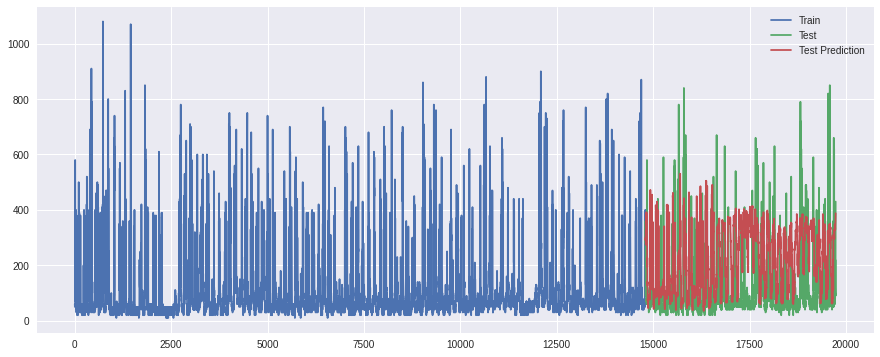

In [ ]:
def plot_evolution():
    plt.figure(figsize=(15, 6))
    plt.plot(np.arange(len(X_train)), y_train, label='Train')
    plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), y_test, label='Test')
    plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), test_predictions, label='Test Prediction')
    plt.legend()
    plt.show()

plot_evolution()